<a href="https://colab.research.google.com/github/Dhanush0720/Hunar-Intern/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving house price data.csv to house price data.csv
Dataset Head:
                   date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140 

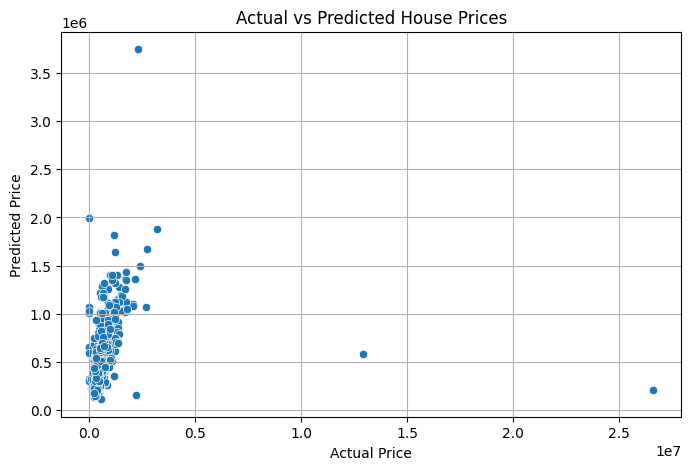

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()

# Assuming uploaded file name is 'house price data.csv'
df = pd.read_csv('house price data.csv')

# Step 3: Display basic information
print("Dataset Head:\n", df.head())
print("\nDataset Info:")
df.info()

# Step 4: Data Preprocessing
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with missing values (or you can fill them if preferred)
df.dropna(inplace=True)

# Step 5: Feature Selection
# Selecting numerical columns only for simplicity
df_numeric = df.select_dtypes(include=[np.number])

# Define features (X) and target (y)
X = df_numeric.drop('price', axis=1, errors='ignore')  # replace 'price' with the actual column name if different
y = df_numeric['price']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Apply Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Model Prediction
y_pred = model.predict(X_test)

# Step 9: Evaluation
print("\nModel Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Optional: Plotting Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
